# 📚 **MINERÍA DE DATOS**
## 💻 Instituto de Investigaciones en Matemáticas Aplicadas y en Sistemas
## 🏫 Universidad Nacional Autónoma de México

<hr>

### 📄 Niveles de Servicio al Cliente

#### Realizado por:
#### Iván Alejadro Ramos Herrera
#### 💜 [@arhcoder](https://github.com/arhcoder)



# **[01] 📺 Caso Netflix**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Logonetflix.png/800px-Logonetflix.png" width=400px/>

***Netflix*** es un servicio de transmisión over-the-top de video bajo demanda por suscripción estadounidense. El servicio distribuye principalmente películas y programas de televisión originales y adquiridos de varios géneros y está disponible internacionalmente en varios idiomas.

# **[02] 💬 Opinión de Usuarios de Netflix**

***Netflix Inc.*** se encuentra interesado en conocer bien qué opinan sus usuarios y el público en general sobre su servicio *(Niveles de Servicio al Cliente)*. Se plantea que al conocer las opiniones que rondan en el internet podrán identificar en lo que pueden mejorar su servicio.

La empresa se encuentra interesada en conocer lo que opinan en internet sobre su servicio y analizar qué es lo que más se habla sobre sus servicio; lo bueno y lo malo.

# **[03] 📋 Proceso de Minería de Datos (CRISP DM)**

El proceso de Minería de Datos en este escenario, siguiendo el modelo ***CRISP-DM***, se puede describir de la siguiente manera:

### Etapa de Entendimiento del Negocio:

1. **Objetivos del Negocio**: Mejorar su servicio al cliente mediante la comprensión de las opiniones de los usuarios a través de las reseñas en TrustPilot.com.

### Etapa de Entendimiento de los Datos:

2. **Obtención de Datos**: Utilizar técnicas de Web Scraping para recolectar miles de reseñas sobre el servicio de Netflix junto con su calificación de 1 a 5 estrellas desde TrustPilot.com. Almacenar estos datos en un archivo CSV con las columnas "review" y "score".

3. **Exploración de Datos**: Realizar un análisis exploratorio de los datos para comprender su estructura y características. Esto incluye la revisión de estadísticas descriptivas, como la distribución de las calificaciones y la longitud de las reseñas.

### Etapa de Preparación de Datos:

4. **Preparación de Datos**: Aplicar técnicas de procesamiento de lenguaje natural (NLP) utilizando SPACY en Python para limpiar las reseñas. Esto incluye la eliminación de símbolos de puntuación, caracteres especiales, lematización, stemming y eliminación de stopwords. Guardar los textos procesados en otro archivo CSV.

### Etapa de Modelado:

5. **Filtrado de Reseñas Negativas**: Filtrar las reseñas que tienen una calificación menor de 3 estrellas, ya que estas se consideran negativas. Estas reseñas se utilizarán para el análisis de palabras clave.

6. **Análisis de Palabras Clave en Reseñas Negativas**: Aplicar técnicas de procesamiento de texto para identificar las palabras más frecuentes en las reseñas negativas. Esto puede incluir la creación de un gráfico de palabras clave con letras de diferente tamaño para visualizar las palabras más mencionadas.

7. **Análisis de Palabras Clave en Reseñas Positivas**: Realizar el mismo análisis de palabras clave en las reseñas con una calificación de 3 estrellas o superior. Esto ayudará a comprender las opiniones positivas de los usuarios.

### Etapa de Evaluación:

8. **Selección de Modelos de Machine Learning**: En esta etapa, se debe determinar qué tipo de modelo de Machine Learning es más adecuado para el análisis. Dado que se planea implementar una regresión logística para predecir la puntuación de una reseña basada en su contenido, se ha elegido este modelo debido a su capacidad para trabajar con características de texto. Además, el uso de TfidfVectorizer permitirá ponderar el impacto de cada palabra en la reseña en el modelo.

### Etapa de Modelado:

9. **Preparación de Datos para el Modelo de Regresión Logística**: Los datos limpios y preprocesados, junto con las puntuaciones, se utilizarán para entrenar el modelo de regresión logística. Antes de hacerlo, se aplicará TfidfVectorizer para transformar las palabras en características numéricas y ponderar su importancia en las reseñas.

10. **Entrenamiento del Modelo de Regresión Logística**: Utilizar los datos preparados para entrenar el modelo de regresión logística. El objetivo es que el modelo aprenda a predecir la puntuación de una reseña basándose en el contenido textual de la misma.

### Etapa de Evaluación:

11. **Evaluación del Modelo de Regresión Logística**: Evaluar el rendimiento del modelo utilizando métricas de regresión, como el error cuadrático medio (MSE) o el coeficiente de determinación (R2). Esto permitirá comprender qué tan bien el modelo es capaz de predecir la puntuación de una reseña en función de su contenido textual.

### Etapa de Implementación:

12. **Implementación del Modelo de Regresión Logística**: Integrar el modelo de regresión logística en los procesos de análisis de opiniones de los usuarios en tiempo real. Esto podría implicar la clasificación automática de nuevas reseñas a medida que llegan a la plataforma de Netflix para ayudar a comprender el sentimiento de los usuarios y la posible puntuación asociada a sus opiniones. Además, se deja la posibilidad de analizar comentarios de redes sociales como Twitter y Facebook, el modelo de regresión logística podría ser aplicado para evaluar el sentimiento de las personas en estas plataformas, lo que podría ser valioso para comprender la percepción pública y la satisfacción del cliente en tiempo real.

# **[04] 📄 Obtención de Datos**

In [ ]:
!pip install lxml

In [35]:
# SCRAPING PARA RESEÑAS DE TRUSTPILOT.COM:
import requests
import lxml.html as html

# PÁGINA PRINCIPAL DE LA EMPRESA:
url = "https://www.trustpilot.com/review/www.netflix.com"

# XPATHS:
XPATH_COMPANY_NAME = '//span[@class="typography_display-s__qOjh6 typography_appearance-default__AAY17 title_displayName__TtDDM"]/text()' #[0]
XPATH_REVIEWS_AMOUNT = '//span[@class="typography_body-l__KUYFJ typography_appearance-subtle__8_H2l styles_text__W4hWi"]/text()' #[0]
XPATH_GENERAL_SCORE = '//p[@class="typography_body-l__KUYFJ typography_appearance-subtle__8_H2l"]/text()' #[0]
XPATH_AMOUNT_PAGES_REVIEWS = '//nav[@role="navigation"]//span//text()' #[len() - 2]

XPATH_REVIEWS_DIV = '//div[@class="styles_reviewContent__0Q2Tg"]' #[:]
XPATH_REVIEWS_TITLES = '//div[@class="styles_reviewContent__0Q2Tg"]//h2/text()' #[:]
XPATH_REVIEWS_STARS = '//div[@class="star-rating_starRating__4rrcf star-rating_medium__iN6Ty"]//img/@src'
XPATH_REVIEWS_TEXTS = '//p[@class="typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn"]' #p[:]

In [11]:
# Función para hacer scraping:
def scrap(pageURL: str, xpath: str):
  '''
    Inputs:
      - pageURL [str]: URL para hacer scraping.
      - xpath [str]: Expresión XPATH para extraer elementos.
    Output:
      - objective [list]: Elements obtained by the XPATH.
  '''
  try:
    response = requests.get(url)
    if response.status_code == 200:
      htmlpage = response.content.decode("utf-8")
      htmlpage = html.fromstring(htmlpage)
      objetive = htmlpage.xpath(xpath)
      return objetive
  except ValueError as error:
    print(error)
    return []

In [59]:
# HACE SCRAPING DE LAS OPINIONES DE NETFLIX:
company = scrap(url, XPATH_COMPANY_NAME)[0]
reviews_amount = scrap(url, XPATH_REVIEWS_AMOUNT)[0]
general_score = scrap(url, XPATH_GENERAL_SCORE)[0]
amount_pages_reviews = scrap(url, XPATH_AMOUNT_PAGES_REVIEWS)
amount_pages_reviews = int(amount_pages_reviews[len(amount_pages_reviews) - 2])

print(f"EMPRESA: {company}\n")
print(f" * Cantidad de Reviews:\t{reviews_amount}")
print(f" * Calificación total:\t{float(general_score)}/5")
print(f" * Páginas de reseñas:\t{amount_pages_reviews}")

EMPRESA: Netflix

 * Cantidad de Reviews:	7,199
 * Calificación total:	1.5/5
 * Páginas de reseñas:	201


In [40]:
# Se obtienen todas las reviews:
print("Obteniendo reviews...")
total_reviews = 0
all_reviews = []
for page in range(1, amount_pages_reviews+1):

  # Para cada página de reviews:
  # print(f"\nPágina {page}:")

  # Obtiene los títulos de la review:
  reviews_titles = scrap(url+"?page="+str(page), XPATH_REVIEWS_TITLES)
  # print(f" * Títulos: {len(reviews_titles)}")

  # Obtiene la imágen de estrellas de la review:
  reviews_stars = scrap(url+"?page="+str(page), XPATH_REVIEWS_STARS)
  reviews_stars.pop(0)

  # Obtiene el texto de la review:
  response = requests.get(url+"?page="+str(page))
  if response.status_code == 200:
      page_content = response.text
      tree = html.fromstring(page_content)
      reviews_elements = tree.xpath(XPATH_REVIEWS_TEXTS)

      # Obtener los textos de las reviews:
      reviews_texts = []
      for review_element in reviews_elements[:]:
          review_text = " ".join(review_element.xpath(".//text()"))
          reviews_texts.append(review_text)
  # print(f" * Reseñas: {len(reviews_texts)}")

  # Se almacenan todas las reviews:
  for i, review in enumerate(reviews_texts):
    # Obtiene la cantidad de estrella para cada review con base en la imágen:
    segment = reviews_stars[i].split("/")
    # El último segmento contiene "stars-n.svg":
    image_name = segment[-1]
    # Divide el nombre del archivo en "stars-" y ".svg" para obtener el número de estrellas:
    stars = image_name.split("stars-")[1].split(".svg")[0]

    # Arma la review:
    review = (str(reviews_titles[i] + ": " + review), stars)
    all_reviews.append(review)
    total_reviews += 1

    if total_reviews % 150 == 0:
      print(f" * {total_reviews} reviews obtenidas...")

print(f"\nTOTAL DE REVIEWS GUARDADAS: {total_reviews}")

Obteniendo reviews...
 * 150 reviews obtenidas...
 * 300 reviews obtenidas...
 * 450 reviews obtenidas...
 * 600 reviews obtenidas...
 * 750 reviews obtenidas...
 * 900 reviews obtenidas...
 * 1050 reviews obtenidas...
 * 1200 reviews obtenidas...
 * 1350 reviews obtenidas...
 * 1500 reviews obtenidas...
 * 1650 reviews obtenidas...
 * 1800 reviews obtenidas...
 * 1950 reviews obtenidas...
 * 2100 reviews obtenidas...
 * 2250 reviews obtenidas...
 * 2400 reviews obtenidas...
 * 2550 reviews obtenidas...
 * 2700 reviews obtenidas...
 * 2850 reviews obtenidas...
 * 3000 reviews obtenidas...
 * 3150 reviews obtenidas...
 * 3300 reviews obtenidas...
 * 3450 reviews obtenidas...
 * 3600 reviews obtenidas...
 * 3750 reviews obtenidas...

TOTAL DE REVIEWS GUARDADAS: 3851


In [50]:
# Ejemplo de review aleatoria:
import random
rand = random.randint(0, len(all_reviews))
print(f"Reseña aleatoria #{rand+1}")
print(f" * Reseña:\n    {all_reviews[rand][0]}")
print(f" * Score: {all_reviews[rand][1]}/5")

Reseña aleatoria #1717
 * Reseña:
    Tired of subtitles: Although the occasional good film comes out, i feel for the price of the subscription, there should be a LOT more headliners on there, but overall okay
 * Score: 2/5


In [53]:
all_reviews[24][0]

"1 star as I can’t give any lower…: Expensive and monopolized with absolutely NO accountability. Seriously, try getting a non-IT issue resolved. You never will. Not an option. Happened several times, but I guess on this site I have to pick one specific date. Lucky them even a review site doesn't have the option to leave a full review."

In [54]:
all_reviews[24][1]

'1'

In [56]:
# Guarda las reseñas como un CSV:
import csv

# Nombre del archivo CSV:
file_name = company+"-Reviews.csv"

# Abrir el archivo CSV en modo escritura:
with open(file_name, mode="w", newline='') as csv_file:
    writer = csv.writer(csv_file)

    # Escribir la cabecera de las columnas:
    writer.writerow(["review", "score"])

    # Escribir las reseñas y puntajes en el archivo CSV:
    for review, score in all_reviews:
        writer.writerow([review, int(score)])

print(f"Reseñas correctamente guardadas en \"{file_name}\" :3")

Reseñas correctamente guardadas en "Netflix-Reviews.csv" :3


# **[05] 🔎 Exploración de los Datos**

Cabeza del dataset:
                                              review  score
0  Tripe!: How this company have become so succes...      2
1  Tricked by Netflix into getting me off basic p...      1
2  Poor customer service: Son had a Netflix accou...      1
3  Just had an email stating my plan is…: Just ha...      1
4  1 star as I can’t give any lower…: 1 star as I...      1

Resumen estadístico de las calificaciones:
count    3851.000000
mean        1.490003
std         0.904874
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: score, dtype: float64


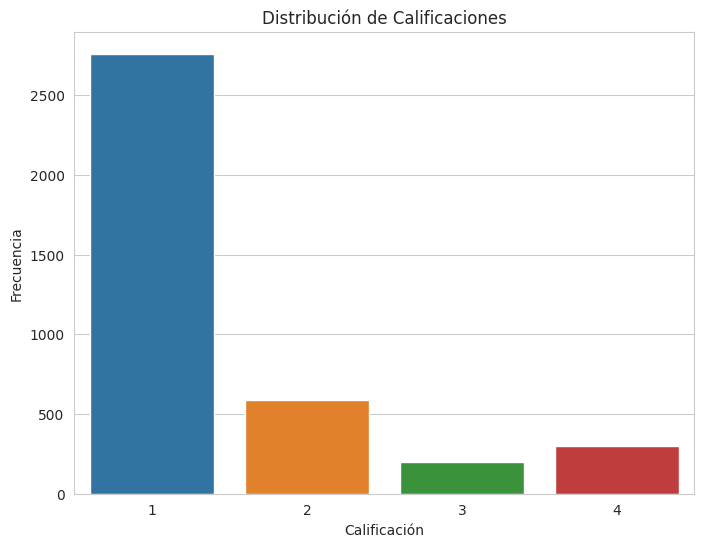

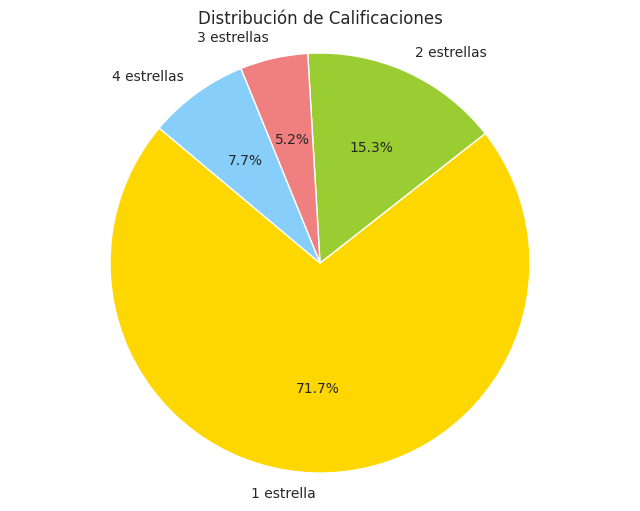

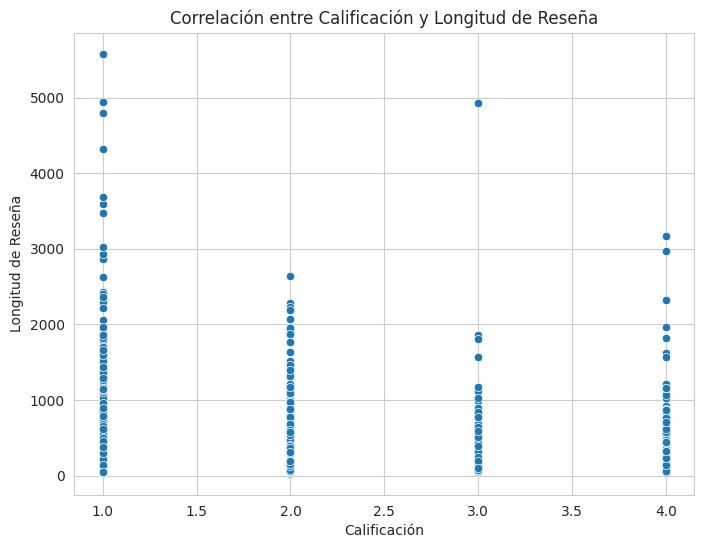

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset desde el archivo csv:
df = pd.read_csv("Netflix-Reviews.csv")

# Visualizando las primeras filas del dataset:
print("Cabeza del dataset:")
print(df.head())

# Resumen estadístico de las calificaciones:
print("\nResumen estadístico de las calificaciones:")
print(df["score"].describe())

# Gráfico de barras de distribución de calificaciones:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.countplot(data=df, x="score")
plt.title("Distribución de Calificaciones")
plt.xlabel("Calificación")
plt.ylabel("Frecuencia")
plt.show()

# Gráfico de pastel de la distribución de calificaciones:
plt.figure(figsize=(8, 6))
labels = ["1 estrella", "2 estrellas", "3 estrellas", "4 estrellas"]
sizes = df["score"].value_counts().sort_index()
colors = ["gold", "yellowgreen", "lightcoral", "lightskyblue", "lightgreen"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Distribución de Calificaciones")
plt.axis("equal")
plt.show()

# Gráfico de correlación entre longitud de reseña y calificación:
df["review_length"] = df["review"].apply(len)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="score", y="review_length")
plt.title("Correlación entre Calificación y Longitud de Reseña")
plt.xlabel("Calificación")
plt.ylabel("Longitud de Reseña")
plt.show()

# **[06] 👅 Preprocesamiento del Lenguaje**

In [ ]:
!pip install spacy
!python -m spacy download en

In [66]:
import pandas as pd
import spacy
import re

# Carga el modelo de spaCy en inglés:
nlp = spacy.load("en_core_web_sm")

# Función para aplicar el procesamiento de texto:
def preprocess_text(text):

  # Eliminar símbolos de puntuación y símbolos especiales:
  text = re.sub(r'[^A-Za-z0-9\s]', '', text)

  # Procesar el texto con spaCy:
  doc = nlp(text)

  # Realizar lematización y eliminación de stopwords:
  processed_text = " ".join([token.lemma_ for token in doc if not token.is_stop])

  return processed_text

# Agrega los resultados a una nueva columna "cleaned_review":
df["cleaned_review"] = df["review"].apply(preprocess_text)

# Guardar los textos ya limpios en otro archivo CSV:
df.to_csv("Netflix-Reviews-NLP.csv", index=False)

In [67]:
df.head(5)

,review,score,review_length,cleaned_review
0,Tripe!: How this company have become so succes...,2,391,tripe company successful testament fool 4 k co...
1,Tricked by Netflix into getting me off basic p...,1,616,trick Netflix get basic plan m basic plan set ...
2,Poor customer service: Son had a Netflix accou...,1,644,poor customer service Son Netflix accountOn ch...
3,Just had an email stating my plan is…: Just ha...,1,469,email state plan email state plan go 1599 1799...
4,1 star as I can’t give any lower…: 1 star as I...,1,391,1 star not low 1 star not low unfortunately ac...


# **[07] 📊 Palabras clave**

## **❌ Reviews Negativas**

50 palabras más frecuentes en las reseñas negativas:
watch, customer service, movie, time, pay, good, service, account, show, content, price go, want, go, m, people, month, say, s, tell, year, try, ve, think, great, new, cancel, money, find, use, work, film, star, company, charge, terrible, bad, need, low, way, serie, day, tv, change, love, well, account hack, ask, know, waste money, issue


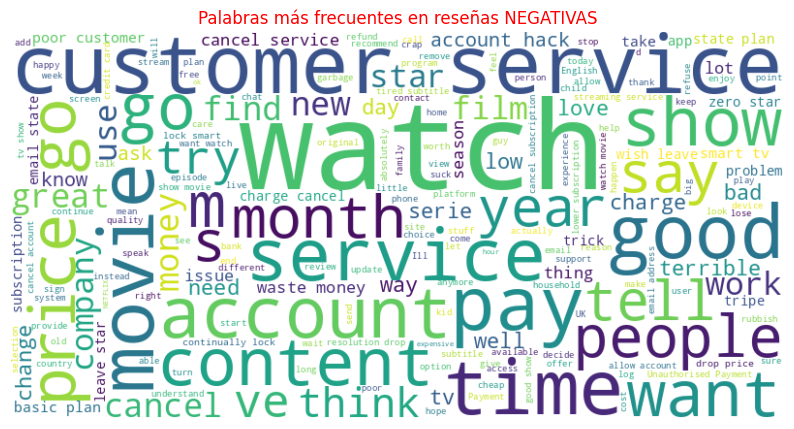

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# RESEÑAS NEGATIVAS:
# Filtra solo las reseñas con calificación menor a 3:
negative_reviews = df[df["score"] < 3]

# Une todas las reseñas negativas en un solo texto:
negative_text = " ".join(negative_reviews["cleaned_review"])

# Ignora palabras no relevantes:
ignore = ["Netflix", "netflix"]
for word in ignore:
    negative_text = negative_text.replace(word, "")

# Realiza un análisis de frecuencia de palabras:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_text)

# Imprimir las 50 palabras más frecuentes en las reseñas:
frecuentes = list(wordcloud.words_.keys())
print("50 palabras más frecuentes en las reseñas negativas:")
print(", ".join(frecuentes[:50]))

# Crear el gráfico de nube de palabras:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Palabras más frecuentes en reseñas NEGATIVAS", color="red")
plt.show()

## **✅ Reviews Positivas**

50 palabras más frecuentes en las reseñas positivas:
enjoy movie, movie, refund nearly, service, show, good, account, cancel, pay, subtitle different, different language, lot content, month, ability watch, watch subtitle, language ad, ad lot, time, watch, film, series, m, go, money, s, new, great, people, customer service, content, want, year, charge, try, find, use, think, need, ve, bad, tv, company, day, love, way, old, app, thing, price, customer


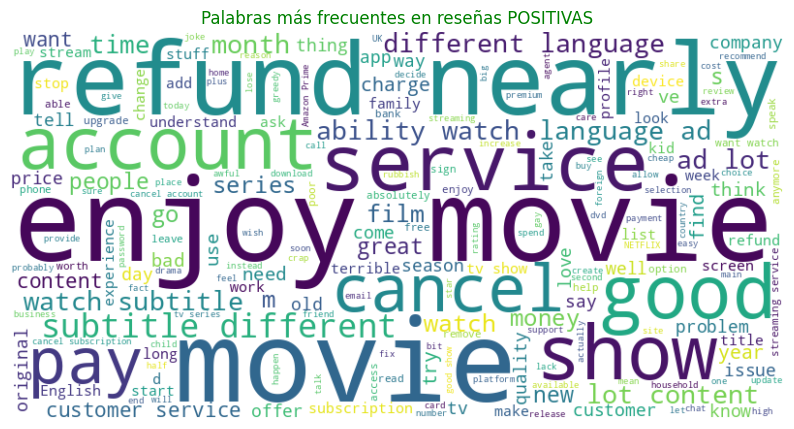

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# RESEÑAS POSITIVAS:
# Filtra solo las reseñas con calificación mayor o igual a 3:
negative_reviews = df[df["score"] >= 3]

# Une todas las reseñas positivas en un solo texto:
positive_text = " ".join(negative_reviews["cleaned_review"])

# Ignora palabras no relevantes:
ignore = ["Netflix", "netflix"]
for word in ignore:
    positive_text = positive_text.replace(word, "")

# Realiza un análisis de frecuencia de palabras:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

# Imprimir las 50 palabras más frecuentes en las reseñas:
frecuentes = list(wordcloud.words_.keys())
print("50 palabras más frecuentes en las reseñas positivas:")
print(", ".join(frecuentes[:50]))

# Crear el gráfico de nube de palabras:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Palabras más frecuentes en reseñas POSITIVAS", color="green")
plt.show()

# **[08] 📈 Regresión Logística**

## 🤖 Modelo

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Dataset limpio:
# df = pd.read_csv("Netflix-Reviews-NLP.csv", encoding="utf-8")

# Dividir el dataset en conjuntos de entrenamiento y prueba:
X = df["cleaned_review"]
y = df["score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Crea un modelo TF-IDF para convertir las reseñas en embeddings:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Crea un modelo de Regresión Logística:
logistic_regression_model = LogisticRegression(max_iter=1000)

# Entrenar el modelo de Regresión Logística:
logistic_regression_model.fit(X_train_tfidf, y_train)

# Realiza predicciones en el conjunto de prueba:
y_pred = logistic_regression_model.predict(X_test_tfidf)

# Calcula la precisión del modelo:
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Precisión del modelo de Regresión Logística: {(accuracy * 100):.2f}%")

# Métricas de evaluación:
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("✅ Reporte de Clasificación:\n")
print(report)

print("\n✅ Matriz de Confusión:\n")
print(confusion)

✅ Precisión del modelo de Regresión Logística: 87.28%
✅ Reporte de Clasificación:

              precision    recall  f1-score   support

           1       0.85      1.00      0.92       819
           2       0.97      0.57      0.72       194
           3       1.00      0.75      0.86        61
           4       0.90      0.44      0.59        82

    accuracy                           0.87      1156
   macro avg       0.93      0.69      0.77      1156
weighted avg       0.88      0.87      0.86      1156


✅ Matriz de Confusión:

[[816   1   0   2]
 [ 83 111   0   0]
 [ 13   0  46   2]
 [ 44   2   0  36]]


## 🔮 Predicción

In [95]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Reviews creadas artificialmente;
# Simularía reviews que pueden encontrarse en Redes Sociales:
new_reviews = [
    "A good option to hang out, it is an excellent service and I enjoy it a lot.",
    "Enojoyable, it is entertaining service, It has original movies. I love how it has multiple subtitles",
    "Good, but it is so expensive",
    "Cool, but I don't like it, I don't want to buy nothing more",
    "I hate how it is so boring"
    ]

for new_review in new_reviews:
  # Preprocesar la nueva revisión (limpiar, lematizar, eliminar stopwords):
  new_review_proccesed = preprocess_text(new_review)

  # Convertir la nueva revisión en un embedding TF-IDF:
  new_review_tfidf = tfidf_vectorizer.transform([new_review_proccesed])

  # Predecir la clase (score) de la nueva revisión:
  prediction = logistic_regression_model.predict(new_review_tfidf)
  print(f"\"{new_review}\"\nScore Predicho: {prediction[0]}\n")

"A good option to hang out, it is an excellent service and I enjoy it a lot."
Score Predicho: 4

"Enojoyable, it is entertaining service, It has original movies. I love how it has multiple subtitles"
Score Predicho: 1

"Good, but it is so expensive"
Score Predicho: 1

"Cool, but I don't like it, I don't want to buy nothing more"
Score Predicho: 1

"I hate how it is so boring"
Score Predicho: 1



# **[09] 🧐 Análisis de resultados**

Se observa de primera instancia que el público y las reseñas en la página ***TrustPilot.com*** son muy negativas hacia el servicio de Netflix. La calificación promedio es de ***1.5/5***, por lo que resulta interesante extraer análisis de por qué la crítica es tan negativa.

<br>

**❌ ¿Por qué la crítica es negativa?**

Palabras claves identificadas llamativas:

- Costumer Service
- Find
- Price
- Pay
- Content
- Time
- Money
- Service
- Waste Money
- Account
- Hack

**Problema común:** La crítica negativa parece originarse debido a la insatisfacción del cliente con el servicio de atención al cliente, la dificultad para encontrar contenido, problemas de precios y pagos, pérdida de tiempo y dinero, y preocupaciones relacionadas con la seguridad de la cuenta y el hackeo.

**Soluciones:**
1. **Mejorar el Servicio al Cliente:** Proporcionar un servicio de atención al cliente eficiente y amigable para resolver problemas y consultas de manera oportuna.
2. **Facilitar la Búsqueda de Contenido:** Optimizar la plataforma para que los usuarios puedan encontrar fácilmente el contenido que desean.
3. **Transparencia en Precios y Pagos:** Hacer que la estructura de precios y los procesos de pago sean claros y accesibles.
4. **Optimizar la Experiencia de Usuario:** Reducir el tiempo y el esfuerzo requerido para utilizar el servicio, asegurando que los clientes obtengan el valor de su dinero.
5. **Refuerzo de Seguridad de la Cuenta:** Implementar medidas de seguridad sólidas para proteger las cuentas de los usuarios y prevenir el hackeo.

<br>

**✅ ¿Por qué la crítica es positiva?**

Palabras claves identificadas llamativas:

- Refund Nearly.
- Enjoy Movie.
- Good.
- Service.
- Subtitle Different.
- Multiple Language.
- Language.
- Cancel.
- Lot Content.
- Watch Subtitle.

Las críticas positivas se basan en una serie de factores que mejoran la experiencia del cliente. Los usuarios suelen expresar su satisfacción cuando:

- Se ofrece un reembolso casi completo ("Refund Nearly") en caso de problemas o insatisfacción.
- Disfrutan de una amplia variedad de películas y contenido ("Enjoy Movie" y "Lot Content").
- La calidad del servicio es apreciada ("Good Service").
- Pueden acceder a subtítulos en diferentes idiomas ("Subtitle Different" y "Multiple Language").
- La plataforma permite a los usuarios ver contenido con subtítulos ("Watch Subtitle").
- Ofrecen opciones de idioma ("Language").
- Hay facilidades para cancelar la suscripción ("Cancel").

Estos elementos positivos influyen en la satisfacción del cliente y generan críticas favorables hacia el servicio. Conviene mantener dichas características o mejorar aún más las mismas.

# [10] 🆗 Conclusiones

En este análisis centrado en el servicio de transmisión de video bajo demanda por suscripción, Netflix, hemos explorado las opiniones de los usuarios a través de la minería de datos y técnicas de procesamiento de lenguaje natural (NLP). Aquí hay algunas conclusiones clave:

1. **Opiniones de Usuarios**: La retroalimentación de los usuarios en Internet, especialmente en plataformas como TrustPilot, proporciona información valiosa sobre la percepción y la satisfacción de los clientes en relación con el servicio de Netflix.

2. **Análisis de Sentimiento**: A través del procesamiento de texto, se analizaron las opiniones para identificar patrones de sentimiento positivo y negativo. Se destacaron palabras y temas clave que influyen en las críticas. **(ACÁ CONVIENE MÁS IMPLEMENTAR MODELOS MÁS CERTEROS BASADOS EN EL ANÁLISIS DE SENTIMIENTO Y QUIZÁS NO TANTO EN EL SCORE DE UNA RESEÑA)**.

3. **Identificación de Problemas Comunes**: Los problemas comunes identificados incluyen preocupaciones relacionadas con el servicio al cliente, la dificultad para encontrar contenido, problemas de precios y pagos, así como cuestiones de seguridad de la cuenta y hackeo.

4. **Mejoras Potenciales**: Netflix puede utilizar estos datos para abordar áreas de mejora, como fortalecer el servicio al cliente, mejorar la experiencia del usuario en la búsqueda de contenido, garantizar una estructura de precios transparente y reforzar la seguridad de las cuentas.

5. **Modelo de Regresión Logística**: Se implementó un modelo de Regresión Logística para predecir la calificación (score) de las reseñas. Es importante recordar que este modelo se utiliza para clasificar reseñas en categorías específicas, no para predecir calificaciones numéricas. ESTE MODELO PUEDE UTILIZARSE **(AUNQUE MUY EN FASE BETA) PARA ANALIZAR LOS COMENTARIOS SOBRE NETFLIX EN LAS REDES SOCIALES**.

6. **Críticas Positivas vs. Negativas**: Las críticas positivas a menudo están relacionadas con la satisfacción del cliente, reembolsos, la variedad de contenido, la calidad del servicio y características como subtítulos en diferentes idiomas. En contraste, las críticas negativas se centran en problemas de atención al cliente, dificultades para encontrar contenido, precios y problemas de seguridad.

Este análisis y el modelo de Regresión Logística proporcionan información valiosa que Netflix puede utilizar para comprender mejor las opiniones de los usuarios y tomar medidas para mejorar la calidad de su servicio. Además, el monitoreo continuo de las críticas y la retroalimentación de los usuarios es esencial para mantener y mejorar la satisfacción del cliente a lo largo del tiempo.

# **💜 @arhcoder**
## Realizado por:
### Iván Alejadro Ramos Herrera
### 💜 [@arhcoder](https://github.com/arhcoder)